In [1]:
try:
  import GPy
except ModuleNotFoundError:
  %pip install GPy
  import GPy

try:
  import jax
except ModuleNotFoundError:
  %pip install jax 
  import jax

import jax.numpy as jnp
import jax
key = jax.random.PRNGKey(42)
jax.config.update("jax_enable_x64", True)

In [2]:
def data(num_points, test_points, key_, noise):

  X =  jnp.linspace(-4, 4, num_points).reshape(-1,1) 
  y = jnp.sin(X)

  test_points = 100
  X_test =  jnp.linspace(-5, 5, test_points).reshape(-1,1) 
  y_test = jnp.sin(X_test)

  if (noise):
    y = y + jax.random.normal(key = key_, shape = (num_points, 1)) * noise**0.5
    y_test = y_test + jax.random.normal(key = key_, shape = (test_points, 1)) * noise**0.5

  return X, y , X_test, y_test


Name : GP regression
Objective : 18.406155187083264
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |   1.33  |      +ve      |        
  Gaussian_noise.variance  |   0.45  |      +ve      |        


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f8931cd36d0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f8931cf4730>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f8931cf57e0>]}

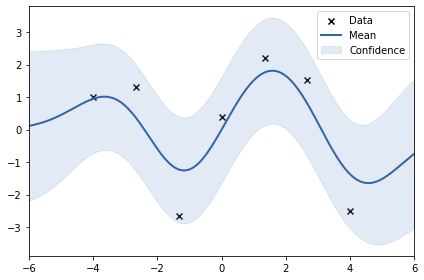

In [3]:
sigmaf = 1
len_scale =  1.33
kernel1 = GPy.kern.RBF(1, sigmaf, len_scale)
kernel2= GPy.kern.StdPeriodic(1, 1, 1.2, 1.33)
kernel = kernel1
X, y, X_test, y_test = data(7, 100, key, noise = 1)
model = GPy.models.GPRegression(X, y, kernel, normalizer=False) 
model.Gaussian_noise = 0.45
model.noise_var = 0.45
print(model)
model.plot()

The default values of the kernel parameters may not be optimal for the current data (for example, the confidence intervals seems too wide on the previous figure). A common approach is to find the values of the parameters that maximize the likelihood of the data. It as easy as calling m.optimize in GPy: The optimizer used is maximum likelihood by L-BFGS,  Limited-memory BFGS 

In [4]:
model.optimize(messages=True)#, max_iters=1e6)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s05  0006   1.415662e+01   2.603728e-03 
    00s08  0010   1.414958e+01   1.768315e-05 
    00s11  0015   1.414944e+01   7.013962e-09 
    00s14  0019   1.414944e+01   1.308912e-10 
    00s14  0020   1.414944e+01   1.308912e-10 
Runtime:     00s14
Optimization status: Converged



If we want to perform some restarts to try to improve the result of the optimization, we can use the optimize_restarts function. This selects random (drawn from N(0,1)) initializations for the parameter values, optimizes each, and sets the model to the best solution found.

In [5]:
model.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = 14.149436962843286
Optimization restart 2/10, f = 14.149436914237233
Optimization restart 3/10, f = 14.149436867626179
Optimization restart 4/10, f = 14.149437128500127
Optimization restart 5/10, f = 14.149437011772294
Optimization restart 6/10, f = 14.149436971770196
Optimization restart 7/10, f = 14.14943696202649
Optimization restart 8/10, f = 14.149436903068736
Optimization restart 9/10, f = 14.149436938591492
Optimization restart 10/10, f = 14.149437105594146



Name : GP regression
Objective : 14.149436867626179
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |   0.2765734954155967  |      +ve      |        
  rbf.lengthscale          |  0.18923419240586786  |      +ve      |        
  Gaussian_noise.variance  |   3.0595809334671245  |      +ve      |        


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f8930206410>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f8930206d40>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f8930206f80>]}

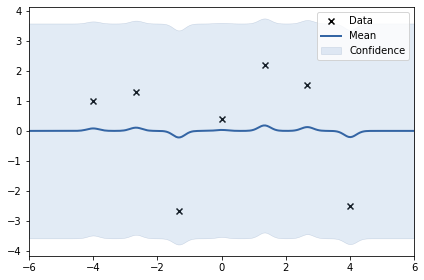

In [6]:
print(model)
model.plot()